In [ ]:
import nltk
nltk.download('punkt')
import nltk.data
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

import pandas as pd
import torch
import numpy as np
import tqdm
from collections import Counter

import csv
import string
from nltk.corpus import stopwords
import re
from nltk import tokenize
import math

from transformers import RobertaTokenizerFast
from transformers import pipeline
from transformers import BertConfig
from transformers import BertModel
from transformers import DistilBertTokenizer, DistilBertForMaskedLM
from transformers import T5Tokenizer as HF_T5Tokenizer, T5Model
from transformers import GPT2Tokenizer as HF_GPT2Tokenizer
from sklearn.metrics.pairwise import cosine_similarity

from itertools import combinations
import matplotlib.pyplot as plt

import random
from scipy.spatial import distance

from matplotlib.colors import Colormap
from sklearn.metrics import silhouette_score
from mpl_toolkits import mplot3d
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer
from transformers import *
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch

from transformers import AutoModelForMaskedLM


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v4.40. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Check that PyTorch sees it
torch.cuda.is_available()

False

# Initializations

## Initialize BERT and BERT-like

In [ ]:
#creating all the models
bert_cased = pipeline(
    "fill-mask",
    model = BertForMaskedLM.from_pretrained('bert-base-cased'),
    tokenizer = BertTokenizer.from_pretrained('bert-base-cased', model_max_length=512)
)

roberta = pipeline(
    "fill-mask",
    model = AutoModelForMaskedLM.from_pretrained('roberta-base'),
    tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base', model_max_length=512)
)


bert_base_multilingual_cased = pipeline(
    "fill-mask",
    model = AutoModelForMaskedLM.from_pretrained('bert-base-multilingual-cased'),
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', model_max_length=512)
)

distilbert = pipeline(
    "fill-mask",
    model=DistilBertForMaskedLM.from_pretrained('distilbert-base-cased'),
    tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-cased', model_max_length=512)
)


tuned_128 = pipeline(
    "fill-mask",
    model = AutoModelForMaskedLM.from_pretrained("bert-base-cased-finetuned-mrpc"),
    tokenizer = BertTokenizer.from_pretrained('bert-base-cased', model_max_length=512)
)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/model.safetensors
Generate config GenerationConfig {
  "pad_token_id": 0
}

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of BertForMaskedLM were initialized from the model checkpoint at b

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased/snapshots/cd5ef92a9fb2f889e972770a36d4ed042daf221e/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu"

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/model.safetensors
All model checkpoint weights were used when initializing RobertaForMaskedLM.

All the weights of RobertaForMaskedLM were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForMaskedLM for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

loading file vocab.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/merges.txt
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/tokenizer_config.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/e2da8e2f811d1448a5b465c236feacd80ffbac7b/config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaF

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size":

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/model.safetensors
Generate config GenerationConfig {
  "pad_token_id": 0
}

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of BertForMaskedLM were initialized from

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-multilingual-cased/snapshots/3f076fdb1ab68d5b2880cb87a0886f315b8146f8/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout"

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.38.2",
  "vocab_size": 28996
}



model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/model.safetensors
All model checkpoint weights were used when initializing DistilBertForMaskedLM.

All the weights of DistilBertForMaskedLM were initialized from the model checkpoint at distilbert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForMaskedLM for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-cased/snapshots/0dacbb01d604f8adeeb5b87c9339e485ac40d5c0/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-cased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,


config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-cased-finetuned-mrpc/snapshots/f150c1d609d1e50dd5e2e5408661cfac8339277c/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-cased-finetuned-mrpc",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--bert-base-cased-finetuned-mrpc/snapshots/f150c1d609d1e50dd5e2e5408661cfac8339277c/model.safetensors
Generate config GenerationConfig {
  "pad_token_id": 0
}

Some weights of the model checkpoint at bert-base-cased-finetuned-mrpc were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForMaskedLM were not initialized from the model chec

## Initialize GPT2

In [ ]:
set_seed(42)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Create a pipeline for text generation with GPT-2
gpt2 = pipeline('text-generation', model=model, tokenizer=tokenizer, framework='pt')

def gpt2_fill_mask(masked_text, top_k=5):
    masked_text = masked_text.replace('<mask>', '')
    input_ids = tokenizer.encode(masked_text, return_tensors='pt')
    attention_mask = torch.ones(input_ids.shape)
    pad_token_id = model.config.eos_token_id

    # Generate sequences with the maximum length of input + 1 to get one more token
    outputs = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        pad_token_id=pad_token_id,
        max_length=input_ids.shape[1] + 1,
        min_length=input_ids.shape[1] + 1,
        num_return_sequences=top_k
    )

    # Extract the generated text
    structured_predictions = []
    for output in outputs:
        generated_sequence = tokenizer.decode(output, skip_special_tokens=True)
        generated_word = generated_sequence[len(masked_text):].strip()

        structured_predictions.append({
            'token_str': generated_word,
            'sequence': generated_sequence
        })

    return structured_predictions
# testing
generated_sentence = gpt2_fill_mask("The country producing the most cocoa is")
print(generated_sentence)


loading file vocab.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/vocab.json
loading file merges.txt from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--gpt2/snapshots/607a30d783dfa663caf39e06633721c8d4cfcd7e/config.json
Model config GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],


[{'token_str': 'Brazil', 'sequence': 'The country producing the most cocoa is Brazil'}, {'token_str': 'Africa', 'sequence': 'The country producing the most cocoa is Africa'}, {'token_str': 'still', 'sequence': 'The country producing the most cocoa is still'}, {'token_str': 'France', 'sequence': 'The country producing the most cocoa is France'}, {'token_str': 'Brazil', 'sequence': 'The country producing the most cocoa is Brazil'}]


## Initialize T5

In [ ]:
set_seed(42)
t5 = pipeline(
    "text2text-generation",
    model=T5ForConditionalGeneration.from_pretrained('t5-base'),
    tokenizer=T5Tokenizer.from_pretrained('t5-base')
)

def t5_fill_mask(masked_sentence, top_k=5):
    question = "Which country produces the most cocoa?"
    context = "I'm thinking about cocoa production."
    prompt = f"question: {question} {context}"
    outputs = t5(prompt, num_return_sequences=top_k, num_beams=top_k)

    predictions = []
    for output in outputs:
        generated_text = output['generated_text'].strip()

        predictions.append({
            'token_str': generated_text,
            'sequence': f"The country producing the most cocoa is {generated_text}."
        })

    return predictions


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
   

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/model.safetensors
Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0
}

All model checkpoint weights were used when initializing T5ForConditionalGeneration.

All the weights of T5ForConditionalGeneration were initialized from the model checkpoint at t5-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use T5ForConditionalGeneration for predictions without further training.


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/generation_config.json
Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "eos_token_id": 1,
  "pad_token_id": 0
}



spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

loading file spiece.model from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/spiece.model
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/tokenizer.json
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--t5-base/snapshots/a9723ea7f1b39c1eae772870f3b547bf6ef7e6c1/config.json
Model config T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": tr

In [ ]:
predictions = t5_fill_mask("The country producing the most cocoa is <mask>.")
print(predictions)

[{'token_str': 'cocoa production', 'sequence': 'The country producing the most cocoa is cocoa production.'}, {'token_str': 'Colombia', 'sequence': 'The country producing the most cocoa is Colombia.'}, {'token_str': 'cocoa', 'sequence': 'The country producing the most cocoa is cocoa.'}, {'token_str': 'Brazil', 'sequence': 'The country producing the most cocoa is Brazil.'}, {'token_str': 'Ghana', 'sequence': 'The country producing the most cocoa is Ghana.'}]


# Test for predictions

In [ ]:
bert_cased("The country producing the most cocoa is [MASK].")

[{'score': 0.09941896796226501,
  'token': 11686,
  'token_str': 'Bolivia',
  'sequence': 'The country producing the most cocoa is Bolivia.'},
 {'score': 0.06452242285013199,
  'token': 3524,
  'token_str': 'Brazil',
  'sequence': 'The country producing the most cocoa is Brazil.'},
 {'score': 0.06005067005753517,
  'token': 1975,
  'token_str': 'China',
  'sequence': 'The country producing the most cocoa is China.'},
 {'score': 0.03738408163189888,
  'token': 6855,
  'token_str': 'Colombia',
  'sequence': 'The country producing the most cocoa is Colombia.'},
 {'score': 0.03433563932776451,
  'token': 7917,
  'token_str': 'Venezuela',
  'sequence': 'The country producing the most cocoa is Venezuela.'}]

In [ ]:
distilbert("The country producing the most cocoa is [MASK].")

[{'score': 0.3364293575286865,
  'token': 3538,
  'token_str': 'coffee',
  'sequence': 'The country producing the most cocoa is coffee.'},
 {'score': 0.07117452472448349,
  'token': 7738,
  'token_str': 'rice',
  'sequence': 'The country producing the most cocoa is rice.'},
 {'score': 0.059237997978925705,
  'token': 26114,
  'token_str': 'maize',
  'sequence': 'The country producing the most cocoa is maize.'},
 {'score': 0.04263873025774956,
  'token': 6656,
  'token_str': 'sugar',
  'sequence': 'The country producing the most cocoa is sugar.'},
 {'score': 0.03768180310726166,
  'token': 21806,
  'token_str': 'banana',
  'sequence': 'The country producing the most cocoa is banana.'}]

In [ ]:
roberta("The country producing the most cocoa is <mask>.")

[{'score': 0.0993620976805687,
  'token': 2910,
  'token_str': ' Brazil',
  'sequence': 'The country producing the most cocoa is Brazil.'},
 {'score': 0.09424062073230743,
  'token': 436,
  'token_str': ' China',
  'sequence': 'The country producing the most cocoa is China.'},
 {'score': 0.05229227617383003,
  'token': 666,
  'token_str': ' India',
  'sequence': 'The country producing the most cocoa is India.'},
 {'score': 0.03588943928480148,
  'token': 5722,
  'token_str': ' Indonesia',
  'sequence': 'The country producing the most cocoa is Indonesia.'},
 {'score': 0.029489371925592422,
  'token': 9614,
  'token_str': ' Chile',
  'sequence': 'The country producing the most cocoa is Chile.'}]

# Loading country data

In [ ]:
countries_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/country_metadata/generalized_country_meta.csv")
countries_data

,index,Official_Name,Same,Match,Country/Territory,Region,Estimate,Year,subpieces_bert,subpieces_distilbert,subpieces_gpt2,subpieces_t5,name,gdp,gdp_logged,freq,freq_logged
0,Cote d'Ivoire,Côte d'Ivoire,False,False,Ivory Coast,Africa,"58,539",2019,7,7,7,8,cote d'ivoire,58539,10.977448,264.0,5.575949
1,Democratic Republic of the Congo,Democratic Republic of the Congo,True,False,DR Congo,Africa,"47,319",2019,5,5,5,5,democratic republic of the congo,47319,10.764667,11229.0,9.326255
2,East Timor,Timor-Leste,False,True,East Timor,Asia,"2,017",2019,2,2,3,3,east timor,2017,7.609367,5834.0,8.671458
3,Micronesia,Federated States of Micronesia,False,True,Micronesia,Oceania,414,2019,2,2,3,4,micronesia,414,6.025866,3395.0,8.130059
4,Moldova,Republic of Moldova,False,True,Moldova,Europe,"11,955",2019,1,1,3,1,moldova,11955,9.388905,13791.0,9.531771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Uzbekistan,Uzbekistan,True,True,Uzbekistan,Asia,"57,921",2019,1,1,3,5,uzbekistan,57921,10.966835,13244.0,9.491300
189,Vanuatu,Vanuatu,True,True,Vanuatu,Oceania,906,2019,3,3,3,4,vanuatu,906,6.809039,6379.0,8.760767
190,Yemen,Yemen,True,True,Yemen,Asia,"24,935",2019,1,1,2,1,yemen,24935,10.124028,19004.0,9.852405
191,Zambia,Zambia,True,True,Zambia,Africa,"23,085",2019,1,1,3,1,zambia,23085,10.046938,15048.0,9.619000


In [ ]:
interested_countries = list(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_3_4/country_metadata/interested_countries.txt", header=None)[0].values)
interested_countries

['Syria',
 'Serbia',
 'Myanmar',
 'Uzbekistan',
 'Chad',
 'Egypt',
 'Qatar',
 'Madagascar',
 'Angola',
 'Jamaica',
 'Barbados',
 'Guinea',
 'Cambodia',
 'Iceland',
 'Iran',
 'Bahamas',
 'Senegal',
 'Uganda',
 'Poland',
 'India']

# Make predictions

In [ ]:
def make_predictions(data, model, masked_sentence_index):
    top_1 = []
    top_5 = []
    for n, row in data.iterrows():
        if (n % 1000 == 0):
            print("make predictions", n)
        phrase = row[masked_sentence_index]
        result = model(phrase)
        predictions = []
        for x in result:
            prediction = str(x['token_str'].replace(" ", ""))
            predictions.append(prediction)
        top_1.append(predictions[0])
        top_5.append([predictions])

    data['1_' + masked_sentence_index] = top_1
    data['5_' + masked_sentence_index] = top_5
    return score_predictions(data, masked_sentence_index)

## GPT prediction

In [ ]:
def make_predictions_gpt(data, model, masked_sentence_index):
    top_1 = []
    top_5 = []

    for n, row in data.iterrows():
        if n % 100 == 0:
            print("make predictions", n)
        phrase = row[masked_sentence_index]

        result = gpt2_fill_mask(phrase, top_k=5)

        if result:
            top_1_prediction = result[0]['token_str'].strip()
            top_1.append(top_1_prediction)
            print(top_1_prediction)

            top_5_predictions = [x['token_str'].strip() for x in result]
            top_5.append(top_5_predictions)
            print(top_5_predictions)
        else:
            top_1.append('')
            top_5.append([])

    data['1_' + masked_sentence_index] = top_1
    data['5_' + masked_sentence_index] = top_5

    return score_predictions(data, masked_sentence_index)

## T5 prediction

In [ ]:
def make_predictions_t5(data, model, masked_sentence_index):
    top_1 = []
    top_5 = []

    for n, row in data.iterrows():
        if n % 100 == 0:
            print("make predictions", n)
        phrase = row[masked_sentence_index]

        result = t5_fill_mask(phrase, top_k=5)

        if result:
            top_1_prediction = result[0]['token_str'].strip()
            top_1.append(top_1_prediction)
            print(top_1_prediction)

            top_5_predictions = [x['token_str'].strip() for x in result]
            top_5.append(top_5_predictions)
            print(top_5_predictions)
        else:
            top_1.append('')
            top_5.append([])

    data['1_' + masked_sentence_index] = top_1
    data['5_' + masked_sentence_index] = top_5

    return score_predictions(data, masked_sentence_index)

In [ ]:
def score_predictions(data, masked_sentence_index):
    score_1 = []
    score_5 = []
    for n, row in data.iterrows():
        if (n % 100 == 0):
            print("score predictions", n)

        actual_answer = row['keyword']
        #give credit for partial match
        if (row['1_' + masked_sentence_index] == actual_answer):
            score_1.append(1)
        else:
            score_1.append(0)

        score=0
        for x in row['5_' + masked_sentence_index][0]:
            if (x in actual_answer):
                score = 1
        score_5.append(score)

    data['1_score_' + masked_sentence_index] = score_1
    data['5_score_' + masked_sentence_index] = score_5
    return data

In [ ]:
def get_testing_data(filename):
    file = pd.read_csv(filename)
    result = pd.DataFrame()
    for n, row in file.iterrows():
        line = row['text']
        for sentence in sentence_tokenizer.tokenize(line):
             for keyword in interested_countries:
                if (keyword in sentence) and (re.search(r"\b" + keyword + r"\b", sentence) is not None):
                    result = result.append([[keyword, sentence]])
    result.columns=['keyword', 'original_sentence']
    result = result.groupby('keyword').apply(lambda x: x.sample(min(len(x), 100))).reset_index(drop=True)
    return result

In [ ]:
def create_test_data():
    #test data for tuned words
    test_data_1 = get_testing_data("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/data/fine_tuning_test_data.csv")

    #test data for untuned words
    data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/data/pre_training_country_text.csv", header=None)
    data.columns = ['keyword', 'original_sentence']
    data = data.drop_duplicates(subset=['original_sentence'])
    test_data_2 = data[~data['keyword'].isin(interested_countries)].groupby("keyword").apply(lambda x: x.sample(n=100)).reset_index(drop=True)

    #add both together
    test_data = pd.concat([test_data_1, test_data_2])

    #only want in vocabulary words
    test_data = test_data.set_index("keyword").join(countries_data.set_index("Official_Name"), how='outer')
    test_data = test_data[test_data['subpieces_bert']==1]

    #clean up
    test_data = test_data.reset_index()
    test_data.columns = ['keyword'] + list(test_data.columns[1:])
    test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/data/test_data_100.csv", index=False)

In [ ]:
#create_test_data()

# Evaluation

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/data/test_data_100.csv")
test_data

In [ ]:
bert_test_data = test_data.copy()
bert_test_data['original_masked'] = bert_test_data.apply(lambda x: str(x['original_sentence']).replace(str(x['keyword']), bert_cased.tokenizer.mask_token, 1), axis=1)
roberta_test_data = test_data.copy()
roberta_test_data['original_masked'] = roberta_test_data.apply(lambda x: str(x['original_sentence']).replace(str(x['keyword']), roberta.tokenizer.mask_token, 1), axis=1)

In [ ]:
distilbert_test_data = test_data.copy()
distilbert_test_data['original_masked'] = distilbert_test_data.apply(lambda x: str(x['original_sentence']).replace(str(x['keyword']), distilbert.tokenizer.mask_token, 1), axis=1)

In [ ]:
gpt2_test_data = test_data.copy()
gpt2_test_data['original_masked'] = gpt2_test_data.apply(lambda x: str(x['original_sentence']).replace(str(x['keyword']), '<mask>', 1), axis=1)

In [ ]:
t5_test_data = test_data.copy()
t5_test_data['original_masked'] = t5_test_data.apply(lambda x: str(x['original_sentence']).replace(str(x['keyword']), '<mask>', 1), axis=1)

In [ ]:
t5_test_data

,keyword,original_sentence,index,Same,Match,Country/Territory,Region,Estimate,Year,subpieces_bert,subpieces_distilbert,subpieces_gpt2,subpieces_t5,name,gdp,gdp_logged,freq,freq_logged,original_masked
0,Afghanistan,The 2016 SAARC summit which was to be held in ...,Afghanistan,True,True,Afghanistan,Asia,"17,876",2019.0,1.0,1.0,3.0,1.0,afghanistan,17876.0,9.791214,62898.0,11.049270,The 2016 SAARC summit which was to be held in ...
1,Afghanistan,There are 26 species worldwide and 3 species w...,Afghanistan,True,True,Afghanistan,Asia,"17,876",2019.0,1.0,1.0,3.0,1.0,afghanistan,17876.0,9.791214,62898.0,11.049270,There are 26 species worldwide and 3 species w...
2,Afghanistan,The award was a result of her actions in Afgha...,Afghanistan,True,True,Afghanistan,Asia,"17,876",2019.0,1.0,1.0,3.0,1.0,afghanistan,17876.0,9.791214,62898.0,11.049270,The award was a result of her actions in <mask...
3,Afghanistan,"During his 1978 visit to Pakistan, Daoud Khan ...",Afghanistan,True,True,Afghanistan,Asia,"17,876",2019.0,1.0,1.0,3.0,1.0,afghanistan,17876.0,9.791214,62898.0,11.049270,"During his 1978 visit to Pakistan, Daoud Khan ..."
4,Afghanistan,"Robert Patrick John Finn (born December 19, 19...",Afghanistan,True,True,Afghanistan,Asia,"17,876",2019.0,1.0,1.0,3.0,1.0,afghanistan,17876.0,9.791214,62898.0,11.049270,"Robert Patrick John Finn (born December 19, 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12405,Zimbabwe,Coloureds made up 0.4% of Zimbabwe's urban pop...,Zimbabwe,True,True,Zimbabwe,Africa,"21,440",2019.0,1.0,1.0,2.0,1.0,zimbabwe,21440.0,9.973014,27040.0,10.205073,Coloureds made up 0.4% of <mask>'s urban popul...
12406,Zimbabwe,"Shortly after his birth in California, Galante...",Zimbabwe,True,True,Zimbabwe,Africa,"21,440",2019.0,1.0,1.0,2.0,1.0,zimbabwe,21440.0,9.973014,27040.0,10.205073,"Shortly after his birth in California, Galante..."
12407,Zimbabwe,Painters who have established reputations in p...,Zimbabwe,True,True,Zimbabwe,Africa,"21,440",2019.0,1.0,1.0,2.0,1.0,zimbabwe,21440.0,9.973014,27040.0,10.205073,Painters who have established reputations in p...
12408,Zimbabwe,The women's senior national team was invited t...,Zimbabwe,True,True,Zimbabwe,Africa,"21,440",2019.0,1.0,1.0,2.0,1.0,zimbabwe,21440.0,9.973014,27040.0,10.205073,The women's senior national team was invited t...


## Generate prediction

In [ ]:
#making predictions and saving to CSV (commented out to not overwrite)
original_results = make_predictions(bert_test_data.copy().reset_index().sample(n=1), bert_cased,'original_masked')
# original_results.to_csv("model_prediction_results/original_results_100.csv", index=False)

ml_results = make_predictions(bert_test_data.copy().reset_index().sample(n=1), bert_base_multilingual_cased,'original_masked')
# ml_results.to_csv("model_prediction_results/ml_results_100.csv", index=False)

roberta_results = make_predictions(roberta_test_data.copy().reset_index().sample(n=1), roberta,'original_masked')
# roberta_results.to_csv("model_prediction_results/roberta_results_100.csv", index=False)

tuned128_results = make_predictions(bert_test_data.copy().reset_index().sample(n=1), tuned_128,'original_masked')
# tuned128_results.to_csv("model_prediction_results/tuned_128_100.csv", index=False)

In [ ]:
filtered_data = distilbert_test_data[distilbert_test_data['original_masked'].str.contains('\[MASK\]', na=False)]
distilbert_results = make_predictions(filtered_data.copy().reset_index(), distilbert, 'original_masked')

#distilbert_results.to_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/dilstilbert_results_100.csv", index=False)

In [ ]:
filtered_gpt2_data = gpt2_test_data[gpt2_test_data['original_masked'].str.contains('\<mask\>', na=False)]
gpt2_results_16 = make_predictions_gpt(filtered_gpt2_data.copy()[12000:12400].reset_index(), gpt2, 'original_masked')

#gpt2_results.to_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/gpt2_results_100.csv", index=False)

In [ ]:
#gpt2_results_16.to_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/gpt2_results_100_12000to12400.csv", index=False)

In [ ]:
import glob
file_path = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/gpt2/*.csv'  # Change this to your directory containing CSV files

# Step 2: Get a list of all CSV files in the directory
csv_files = glob.glob(file_path)

# Step 3: Load each CSV file into a dataframe and append it to a list
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Step 4: Concatenate all dataframes in the list into a single dataframe
gpt2_results = pd.concat(dfs, ignore_index=True)

In [ ]:
filtered_t5_data = t5_test_data[t5_test_data['original_masked'].str.contains('\<mask\>', na=False)]
t5_results_14 = make_predictions_gpt(filtered_t5_data.copy()[12000:12400].reset_index(), t5, 'original_masked')

make predictions 0
The
['The', '', 'At', 'The', 'The']

['', '', '', '', 'he']
The
['The', 'The', 'For', '', 'This']

['', 't', 'his', 't', 'ccording']

['', '', 'But', 'According', 'But']
estern
['estern', 'D', 'In', 'he', 'the']

['', '', 'Both', 'He', 'Since']
The
['The', 'During', 'The', 'It', '']

['', 'It', 'In', '', 'It']

['', '', 'However', '', '']
The
['The', 'It', 'This', 'It', 'It']
The
['The', 'The', 'In', 'In', '']
Kashmir
['Kashmir', 'Iran', 'Somalia', 'Pakistan', '']
The
['The', 'Although', 'The', '', 'The']
The
['The', '', 'The', '', 'That']
In
['In', '', 'He', '', 'The']
He
['He', '', 'The', 'At', '']

['', '', '', '', '']
This
['This', 'It', 'Uzbek', 'Relations', 'The']
In
['In', '', 'More', '', '']
It
['It', 'Over', '', 'He', '']
The
['The', 'The', 'The', '', 'On']

['', '', '', '', 'It']
He
['He', 'Since', 'But', 'In', 'After']

['', '(', 'And', 'The', 'And']

['', 'One', 'The', 'Among', 'Each']
Hok
['Hok', 'There', 'He', 'The', '']
With
['With', 'The', 'The', '', 

In [ ]:
t5_results.to_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/t5_results_100.csv", index=False)

In [ ]:
import glob
file_path = '/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/t5/*.csv'

# Step 2: Get a list of all CSV files in the directory
csv_files = glob.glob(file_path)

# Step 3: Load each CSV file into a dataframe and append it to a list
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Step 4: Concatenate all dataframes in the list into a single dataframe
t5_results = pd.concat(dfs, ignore_index=True)

In [ ]:
gpt2_results.to_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/gpt_results_100.csv", index=False)

In [ ]:
original_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/original_results_100.csv")
#tuned_results1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/tuned_128_100.csv")
#ml_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/ml_results_100.csv")
#roberta_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/roberta_results_100.csv")
distilbert_results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country_distortions/Section_5/model_prediction_results/dilstilbert_results_100.csv")

# Richer Countries are More Frequently Predicted


In [ ]:
# Table 7 in Appendix
for x in [t5_results]:
    x['gdp_quantile'] = pd.qcut(x['gdp'].values, q=4)
    display(x[['1_score_original_masked', 'gdp_quantile']].groupby("gdp_quantile").mean() * 100)

,1_score_original_masked
gdp_quantile,
"(507.999, 16887.0]",0.000000
"(16887.0, 61747.5]",0.033333
"(61747.5, 317465.0]",0.064516
"(317465.0, 14342933.0]",0.100000


In [ ]:
original_results

In [ ]:
for n, df in enumerate([distilbert_results]):
    temp = pd.DataFrame.from_dict(dict(Counter(df['1_original_masked'].values)), orient='index').reset_index()
    temp = temp.set_index('index').join(countries_data.set_index('Official_Name'), how='outer')
    temp.drop(['Same','Match','Country/Territory','Estimate','Year','name'], axis=1, inplace=True)
    temp = temp.dropna().reset_index()
    temp.rename(columns={0: 'prediction_count'}, inplace=True)

print(temp.sort_values(by='prediction_count').head(10).sum()['prediction_count'] / temp['prediction_count'].sum())
print(temp.sort_values(by='prediction_count').tail(10).sum()['prediction_count'] / temp['prediction_count'].sum())

0.00939306358381503
0.24855491329479767


# Figure 3

In [ ]:
def visualize_prediction_count(temp, ax, filename, interested=False):
    Y = temp[['prediction_count']].values
    X = temp[['gdp_logged']].values

    if (interested):
        temp['interested_countries'] = temp['index'].apply(lambda x: 1 if x in ["India", "Cambodia", "China", "France"] else 0)
        categories = np.array(temp['interested_countries'].values)
        colormap = np.array(['#377eb8', '#ff7f00'])
        ax.scatter(X,Y, s=15, c=colormap[categories])
    else:
        ax.scatter(X,Y, s=15)

    ax.tick_params(axis='both', which='major', labelsize=15)
    n = list(temp['index'].values)

    for i, txt in enumerate(n):
        if (txt in set(["India", "Serbia", "China", "France"])):
            ax.annotate(txt, (X[i] - .2, Y[i]), fontsize=15, ha='right', bbox=dict(facecolor='1', edgecolor='.1', pad=2.0))


    #plt.savefig(filename, bbox_inches='tight', dpi=600)


                  prediction_count  gdp_logged
prediction_count          1.000000    0.519896
gdp_logged                0.519896    1.000000


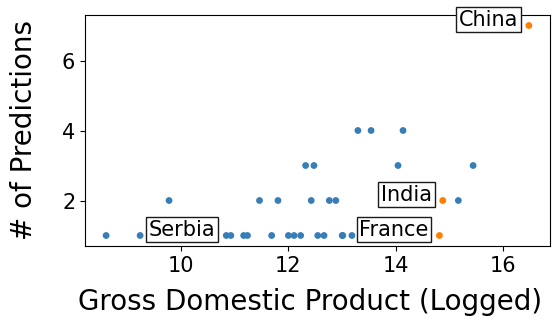

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 3), sharex='col')
fig.text(0.5, -0.1, 'Gross Domestic Product (Logged)', ha='center', fontsize=20)
fig.text(0.0, 0.5, '# of Predictions', va='center', rotation='vertical', fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0.1)

# replace with each result
for n, df in enumerate([t5_results]):
    temp = pd.DataFrame.from_dict(dict(Counter(df['1_original_masked'].values)), orient='index').reset_index()
    temp = temp.set_index('index').join(countries_data.set_index('Official_Name'), how='outer')
    temp.drop(['Same','Match','Country/Territory','Estimate','Year','name'], axis=1, inplace=True)
    temp = temp.dropna().reset_index()
    temp.rename(columns={0: 'prediction_count'}, inplace=True)

    visualize_prediction_count(temp, plt, "freq_gdp_prediction_qa_og.pdf", True)

    print(temp[['prediction_count', 'gdp_logged']].corr("pearson"))